# MinHash and Jaccard Similarity

### Jaccard Similarity

The Jaccard Similarity, also known as the Jaccard index, is a measure used to calculate the similarity and diversity of sample sets. It's defined as the size of the intersection divided by the size of the union of the sample sets.

**Equation:**

$$ J(A, B) = \frac{|A \cap B|}{|A \cup B|} $$

Where:
- $A$ and $B$ are two sets.
- $|A \cap B|$ is the number of elements common to both sets.
- $|A \cup B|$ is the total number of distinct elements in both sets.

### MinHash

MinHash is a technique for estimating the similarity between two sets, specifically designed to efficiently estimate the Jaccard similarity of large sets. It is particularly useful in reducing the dimensionality of high-dimensional data sets.

Suppose you have 4 sets: $S_1$, $S_2$, $S_3$, $S_4$. The existence of element in each set is described in the corresponding row/column.

| Element | $S_1$ | $S_2$ | $S_3$ | $S_4$ | 
|---------|-------|-------|-------|------|
|    a    |   1   |   0   |   0   |   1  |
|    b    |   0   |   0   |   1   |   0  |
|    c    |   0   |   1   |   0   |   1  |
|    d    |   1   |   0   |   1   |   1  |
|    e    |   0   |   0   |   1   |   0  |

The basic idea behind MinHash is to use a system internal hash function to hash each of the elements in a set and return the minimum value of the hash values. The resulting hash value can be used to compare two sets. MinHash can be explained differently. Let $f: Elements \to [N]$ be a function that generate a permutation of the elements. Then MinHash is equal to returning a hash associated with the element with the smallest permutation index. In mathematical expressions, return  $hash(f^{-1}(1))$.

If the permutation produces *beadc*, then the table becomes the following:

| Element | $S_1$ | $S_2$ | $S_3$ | $S_4$ | 
|---------|-------|-------|-------|------|
|    b    |   0   |   0   |   1   |   0  |
|    e    |   0   |   0   |   1   |   0  |
|    a    |   1   |   0   |   0   |   1  |
|    d    |   1   |   0   |   1   |   1  |
|    c    |   0   |   1   |   0   |   1  |

Then, getting a MinHash $h$ for a set $S$ simply means to find a first row in the column where the cell is $1$. Therefore, we see that $h(S_1) = hash(a), h(S_2) = hash(c), h(S_3) = hash(b), h(S_4) = hash(a)$.


### Types of Rows and Permutations

In the context of comparing two sets $x$ and $y$, there are $3$ types of rows:

- **Type X rows**: Have a 1 in both columns, representing elements common to both sets ($x \cap y$).
- **Type Y rows**: Have a 1 in one column and 0 in the other, representing elements unique to either set ($x \setminus y$ or $y \setminus x$).
- **Type Z rows**: Have a 0 in both columns, representing elements not present in either set and are irrelevant for our computation.

### Probability Calculation

The probability that the minhash value for $x$ equals the minhash value for $y$ ($P(h(x) = h(y))$) is directly tied to which type of row is encountered first in the random permutation:

- **Encountering Type X First**: If the first row in that permutation that is not of Type Z (which we ignore since it doesn't contribute to either set) is of Type X, this means that both sets $x$ and $y$ have this element in common. The probability of this happening is the ratio of Type X rows to the total non-Type Z rows encountered, which is $x / (x + y)$.

- **Encountering Type Y First**: Conversely, if the first relevant row encountered is of Type Y, this indicates that we've hit an element unique to one of the sets before finding a common one. The probability of this scenario is $y / (x + y)$, as it represents the ratio of unique elements (Type Y) to the total of unique and common elements.

- Thus we can see that the $P(h(x) = h(y)) = J(x, y)$.

For example, let's compare $S_1$ and $S_4$ using MinHash. Of all the random permutations of $a, b, c, d, e$, the permutation that orders type X (row $a, d$) first among orderings of type X or type Y (row $a, d, c$) is 2/3. 

| Element | $S_1$ | $S_4$ | 
|---------|-------|-------|
|    a    |   1   |   1   |
|    d    |   1   |   1   |
|    c    |   0   |   1   |

## Algorithm Overview:

The MinHash algorithm is designed to efficiently estimate the Jaccard similarity between two sets, which is a measure of the similarity between the sets based on the size of their intersection divided by the size of their union. The Jaccard similarity is defined as $J(A, B) = \frac{|A \cap B|}{|A \cup B|}$ for sets $A$ and $B$. MinHash is particularly useful for large datasets where direct computation of the Jaccard similarity would be computationally expensive.

### Steps of the MinHash Algorithm

The MinHash algorithm involves the following steps:

1. **Choose a Collection of Hash Functions**:
    - Select $n$ different hash functions, $h_1, h_2, ..., h_n$, that can uniformly and randomly hash the elements of the sets. The choice and quality of these hash functions are crucial for the accuracy of the MinHash algorithm.

2. **Create MinHash Signatures**:
    - For each set, compute its MinHash signature, which is a compact representation of the set. A MinHash signature for a set is created by applying each hash function to each element in the set and taking the minimum hash value obtained for each hash function.
    - Specifically, for each hash function $h_i$, compute $h_i(x)$ for all elements $x$ in the set and record the minimum value as the $i^{th}$ component of the signature. This results in a signature consisting of $n$ minimum hash values, one for each hash function.

3. **Estimate Jaccard Similarity**:
    - To estimate the Jaccard similarity between two sets $A$ and $B$, compare their MinHash signatures. The estimated similarity is the proportion of hash functions for which the minimum hash values are the same in both signatures.
    - Mathematically, if $S_A$ and $S_B$ are the MinHash signatures for sets $A$ and $B$ respectively, then the estimated Jaccard similarity $J'(A, B)$ is given by:
      $$ J'(A, B) = \frac{|\{i \mid S_A[i] = S_B[i]\}|}{n} $$
      where $n$ is the number of hash functions used, and $S_A[i]$ and $S_B[i]$ are the $i^{th}$ components of the MinHash signatures of $A$ and $B$, respectively.

### Why It Works

The core idea behind MinHash is that the probability of a hash function assigning the minimum hash value to the same element in both sets is equal to the Jaccard similarity of those sets. This is because the hash functions are designed to be random and uniform, making each element equally likely to be the minimum. Therefore, the more often the minimum hash values are the same for both sets across multiple hash functions, the more similar the sets are likely to be.

### Applications

MinHash is widely used in various applications, including:
- Detecting duplicate or similar documents (such as web pages or text files) in large datasets.
- Clustering and classification tasks where measuring similarity between items is necessary.
- Recommender systems, to find users or items that are similar to each other.

### Advantages

- **Efficiency**: MinHash significantly reduces the computational complexity of estimating set similarity, especially beneficial for large datasets.
- **Scalability**: The algorithm can handle very large sets and is easily parallelizable, making it suitable for distributed computing environments.
- **Flexibility**: It can be adapted to various types of data and similarity measures by choosing appropriate hash functions.

MinHash provides a balance between computational efficiency and accuracy in estimating the Jaccard similarity, making it a valuable tool in data mining and analysis tasks involving large datasets.

Estimated Jaccard Similarity, Single Run: 0.5


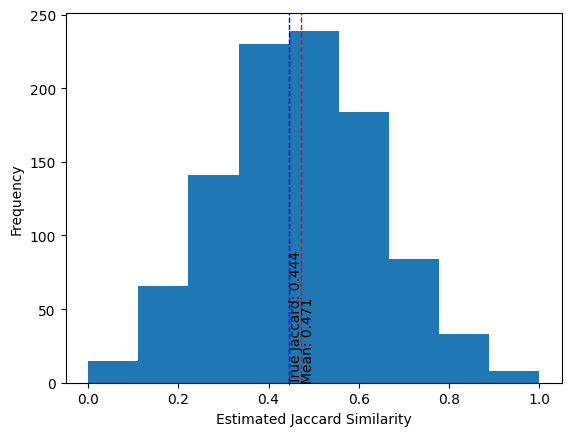

In [42]:
import random

def generate_hash_functions(num_hash_functions, universe_size):
    hash_functions = []
    for i in range(num_hash_functions):
        # Generate a and b for a simple hash function: h(x) = (a*x + b) % universe_size
        a = random.randint(1, universe_size-1)
        b = random.randint(0, universe_size-1)
        hash_functions.append((a, b))
    return hash_functions

def minhash(set_elements, hash_functions, universe_size):
    signature = [float('inf')] * len(hash_functions)
    for element in set_elements:
        for i, (a, b) in enumerate(hash_functions):
            hash_val = (a * element + b) % universe_size
            signature[i] = min(signature[i], hash_val)
    return signature

def estimate_jaccard(set1_signature, set2_signature):
    matches = 0
    for i in range(len(set1_signature)):
        if set1_signature[i] == set2_signature[i]:
            matches += 1
    return matches / len(set1_signature)

# Example usage
universe_size = 100  # Assume elements are integers in the range [0, universe_size)
num_hash_functions = 10  # Number of hash functions to use in the signature
hash_functions = generate_hash_functions(num_hash_functions, universe_size)

set1 = {1, 3, 5, 7, 9, 11}
set2 = {1, 2, 3, 7, 11, 13, 17}

# set1 \cap set2 = {1, 3, 7, 11}
# set1 \cup set2 = {1, 2, 3, 5, 7, 9, 11, 13, 17}
# Jaccard Similarity = |set1 \cap set2| / |set1 \cup set2| = 4 / 9 = 0.444

set1_signature = minhash(set1, hash_functions, universe_size)
set2_signature = minhash(set2, hash_functions, universe_size)

estimated_jaccard = estimate_jaccard(set1_signature, set2_signature)

print(f"Estimated Jaccard Similarity, Single Run: {estimated_jaccard}")

# Run several times to see how the estimated Jaccard similarity varies
# Plot the distribution of estimated Jaccard similarities to see how accurate the estimation is

import matplotlib.pyplot as plt
import numpy as np

num_trials = 1000
estimated_jaccards = []
for _ in range(num_trials):
    hash_functions = generate_hash_functions(num_hash_functions, universe_size)
    set1_signature = minhash(set1, hash_functions, universe_size)
    set2_signature = minhash(set2, hash_functions, universe_size)
    estimated_jaccards.append(estimate_jaccard(set1_signature, set2_signature))

plt.hist(estimated_jaccards, bins=np.linspace(0, 1, 10))
plt.xlabel('Estimated Jaccard Similarity')
plt.ylabel('Frequency')
# Show mean
mean = np.mean(estimated_jaccards)
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
plt.text(mean, 0, f'Mean: {mean:.3f}', rotation=90, verticalalignment='bottom')

# Show true Jaccard similarity
true_jaccard = len(set1 & set2) / len(set1 | set2)
plt.axvline(true_jaccard, color='b', linestyle='dashed', linewidth=1)
plt.text(true_jaccard, 0, f'True Jaccard: {true_jaccard:.3f}', rotation=90, verticalalignment='bottom')

plt.show()


# Feature Hashing

* $E[h(m)^Th(x)] = m^Tx$
* TODO